In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const
import pickle
import pandas as pd
import os

WIDTH = 100e-6
LENGTH = 300e-6


# Part A


room temp 21.9

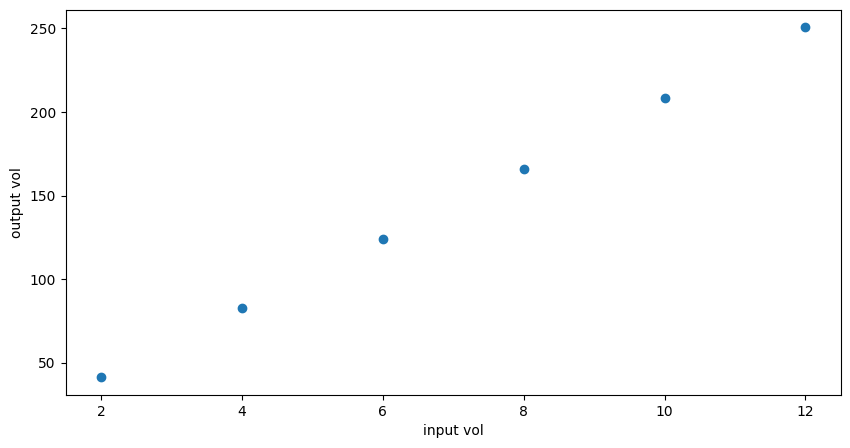

In [137]:

data = np.loadtxt('data/no_mag.txt', skiprows=3)

# Data
input_vol = data[:, 0]
output_vol = data[:, 1]
output_current = data[:, 2]

plt.figure(figsize=(10, 5))
plt.subplot
plt.plot(input_vol, output_vol, 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.show()


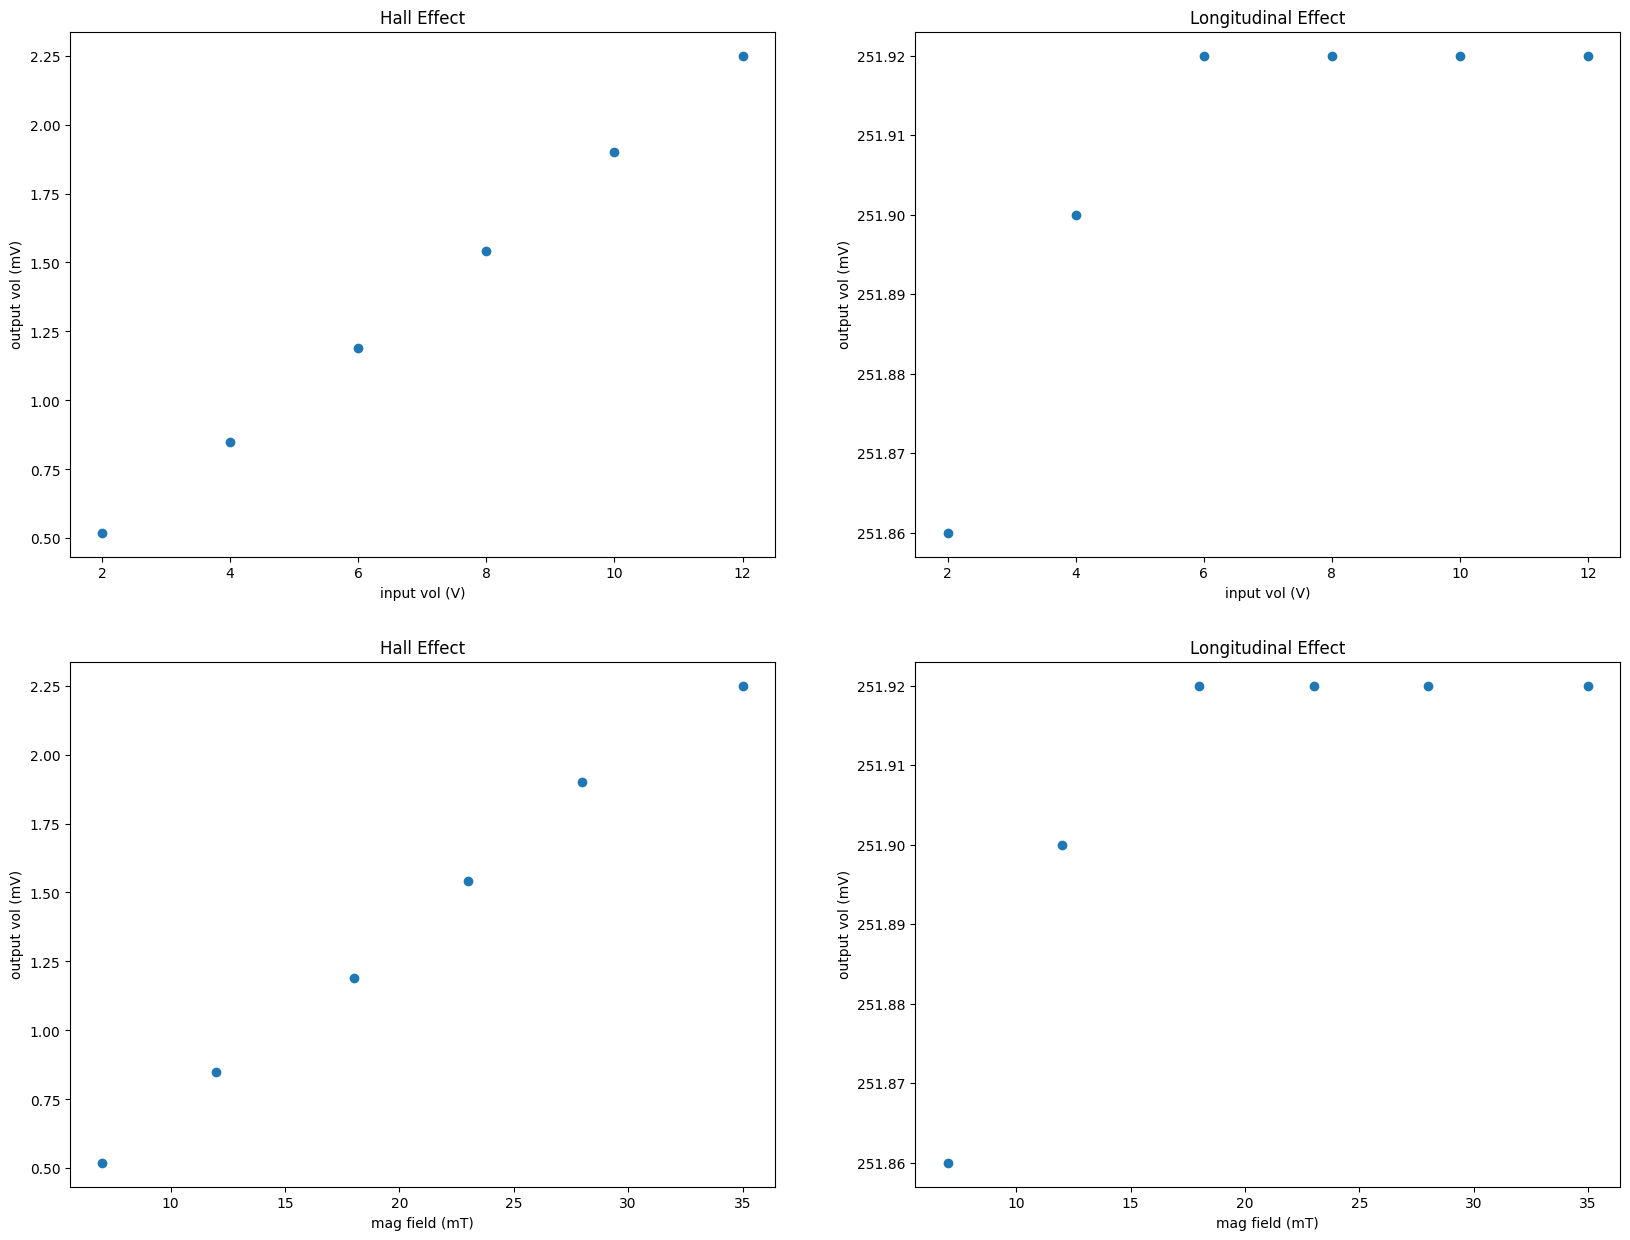

The number density in the hall bar is 5.647e+15, and the mobility is 0.491


In [138]:
def r_hall_2d(B, I, Vh):
    '''
    B is the magnetic field in mT \n
    I is the current in micro A \n
    Vh is the hall voltage in mV
    '''
    return Vh/(I*B*1e-3)

def res(V,I):
    '''
    V is the voltage in mV \n
    I is the current in micro A
    '''
    return (V*1e-3)/(I*1e-6)

def r_per_sq(res, width, length):
    '''
    res is the resistance in ohms \n
    width is the width of the sample in micro m \n
    length is the length of the sample in micro m
    '''
    return (res*width)/length

def num_per_sq(r_hall_2d):
    '''
    r_hall_2d is the function with parameters (B, I, Vh) \n
    '''
    return 1/(r_hall_2d*const.e)

def mobility(r_per_sq, n_per_sq):
    '''
    r_per_sq is the function with parameters (res, width, length) \n
    n_per_sq is the function with parameters (B, I, Vh) \n
    '''
    return 1/(n_per_sq*r_per_sq*const.e)#


data_hall = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
hall_err = {
    '''
    out_vol in V
    out_cur in A
    b_field in T
    '''
    'out_vol': [5e-6,5e-6,5e-6,5e-6,5e-6,5e-6],
    'out_cur': [5e-9,5e-9,5e-9,5e-9,5e-9,5e-9],
    'b_field': [5e-4,5e-4,5e-4,5e-4,5e-4,5e-4]
    }

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(data_hall[:, 0], data_hall[:, 1], 'o', label='Data')
plt.xlabel('input vol (V)')
plt.ylabel('output vol (mV)')
plt.title('Hall Effect')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.xlabel('input vol (V)')
plt.ylabel('output vol (mV)')
plt.title('Longitudinal Effect')
plt.subplot(2,2,3)
plt.plot(data_hall[:, 3], data_hall[:, 1], 'o', label='Data')
plt.xlabel('mag field (mT)')
plt.ylabel('output vol (mV)')
plt.title('Hall Effect')
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.xlabel('mag field (mT)')
plt.ylabel('output vol (mV)')
plt.title('Longitudinal Effect')
plt.show()


n_sq = []
for i in np.arange(len(data_hall[:, 3])):
    n_sq.append(num_per_sq(r_hall_2d(data_hall[i, 3], data_hall[i, 1], data_hall[i, 2])))

n_sq_mean = np.mean(np.array(n_sq))

mu = []
for i in np.arange(len(data_long[:, 2])):
    mu.append(mobility(r_per_sq(res(data_long[i, 1], data_long[i, 2]),WIDTH,LENGTH), n_sq_mean))

mu = np.mean(np.array(mu))

print(f'The number density in the hall bar is {n_sq_mean:.4g}, and the mobility is {mu:.3f}')


In [139]:
print(r_hall_2d(data_hall[3, 3], data_hall[3, 1], data_hall[3, 2]))


1053.9243365330321


# Part B

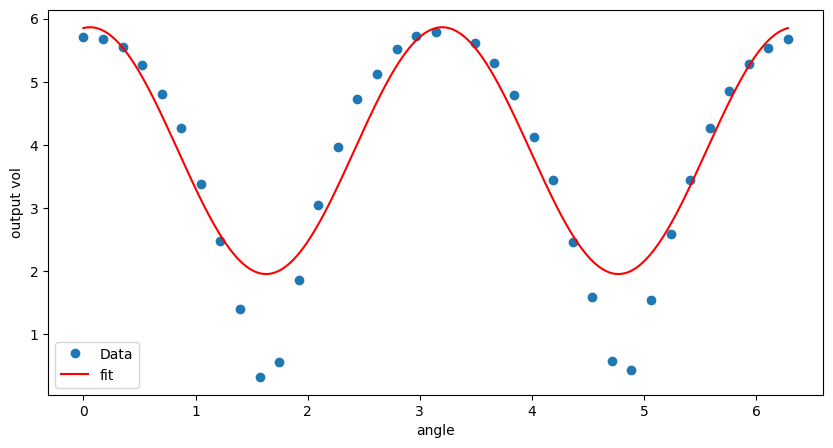

[ 1.95453368 -0.11762953]
the standard deviation is 0.0023693525441128857 on the amplitude, and 0.005598077219668391 on the phase


In [140]:
data = np.loadtxt('data/angle.txt', skiprows=2)
vol = data[:, 0]
angle = np.deg2rad(data[:, 1])
# x and b are in degrees, a is an amplitude constant

def func(x, a, b):
    return (a*np.cos(2*x + b)+2*a)

popt, pcov = curve_fit(func, angle, vol,p0 = (3.4,0))

angle_range = np.linspace(0, 2*np.pi, 1000)
plt.figure(figsize=(10, 5))
plt.plot(angle, vol,'o' ,label='Data')
plt.plot(angle_range, func(angle_range, *popt), 'r-', label='fit')
plt.xlabel('angle')
plt.ylabel('output vol')
plt.legend()
plt.show()
print(popt)
print(f'the standard deviation is {np.abs(np.diag(pcov)[0])} on the amplitude, and {np.abs(np.diag(pcov)[1])} on the phase')


# Part C

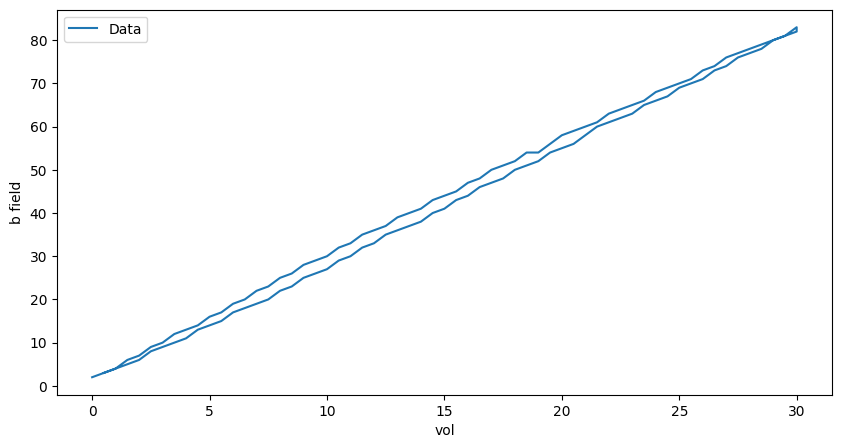

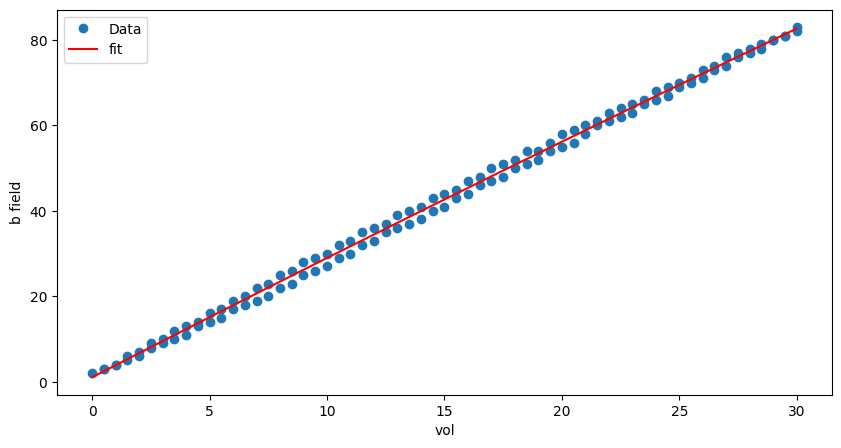

In [141]:
data =np.loadtxt('data/b_field_calibration.txt', skiprows=2)
vol = data[:, 0]
current = data[:, 1]
b_field = data[:, 2]
# x and b are in degrees, a is an amplitude constant
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field, label='Data')

plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()

def poly(x, a, b, c):
    return a*x**2 + b*x + c

pop, pcov = curve_fit(poly, vol, b_field,p0 = (1,1,1))

vol_range = np.linspace(0, 30, 1000)
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field,'o' ,label='Data')
plt.plot(vol_range, poly(vol_range, *pop), 'r-', label='fit')
plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()



# Part D

.DS_Store
Hall_data.pickle
-------------------------------------
Hall voltage data at 300K
The hall coeffiecient at 300K is 1841.6563206252374 ± 2.3723967494702474m^3/C
The number of charge carriers per square is 3.389e+15 ± 


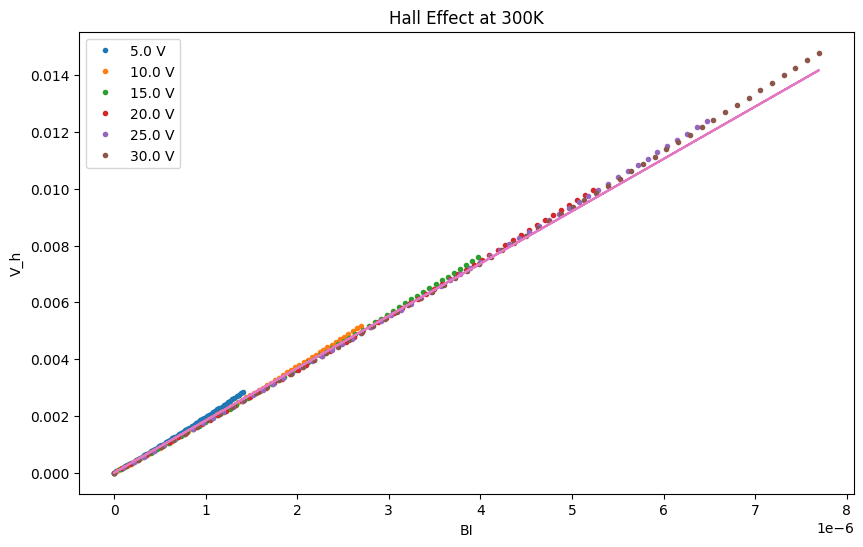

Long_data.pickle
-------------------------------------
Longitudinal data at 300K
The Resistance per square at 300K is 2341.2024886420795 ± 4.986726484809995 


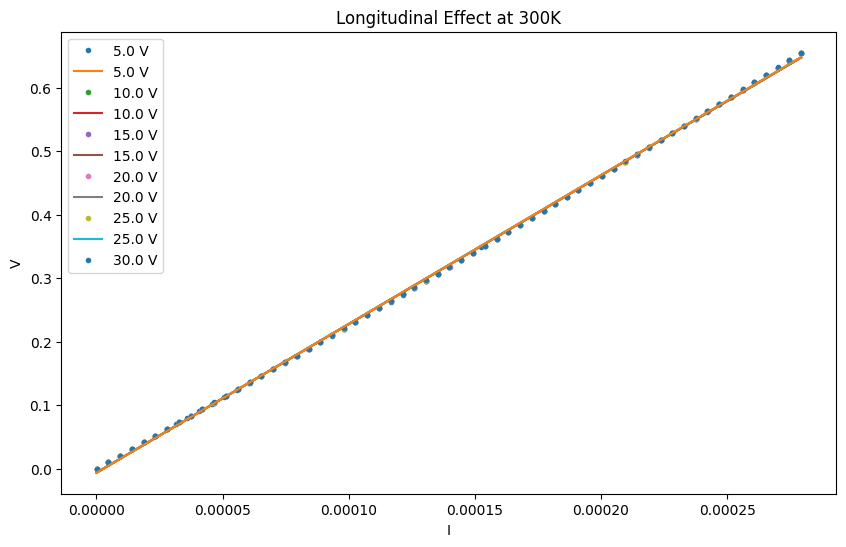

Hall_cold_data.pickle
-------------------------------------
Hall voltage data at close to Liquid Nitrogen (78.4K)
The hall coeffiecient at close to Liquid Nitrogen (78.4K) is 2608.999009593543 ± 1.207175937766617 m^3/C
The number of charge carriers per square is 2.392e+15 ± 


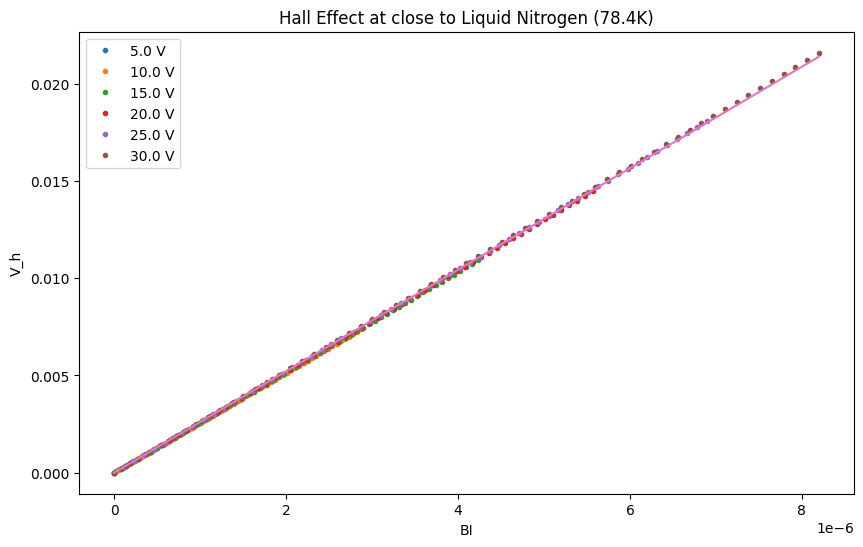

Long_cold_data_main.pickle
-------------------------------------
Longitudinal data at close to Liquid Nitrogen (78.4K)
The Resistance per square at close to Liquid Nitrogen (78.4K) is 142.0945811177822 ± 0.03867257498923263 


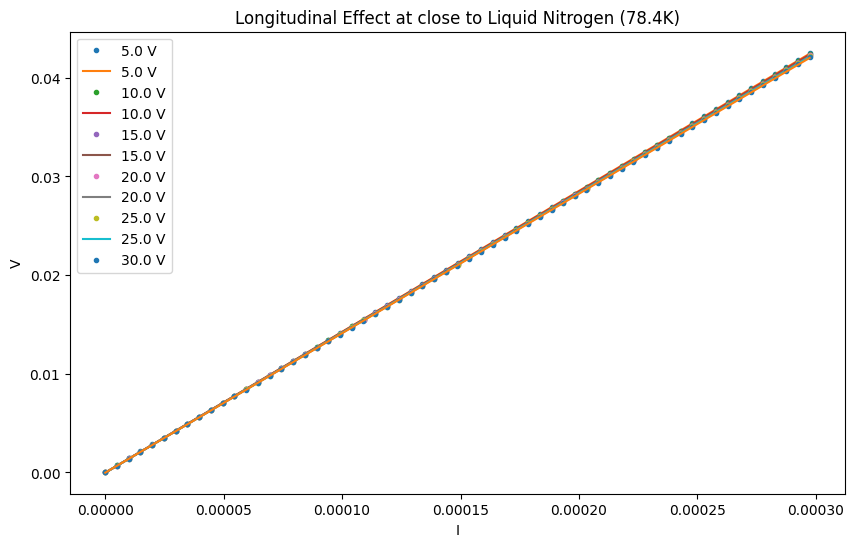

3389073740067738.5 2341.2024886420795
The mobility at 300K is 0.7866 ± 
The mobility at close to Liquid Nitrogen (78.4K) is 18.36 ± 


In [169]:
def linear(x, a, b):
    return a*x + b

hall_data = pd.read_pickle('data/part_D/Hall_data.pickle')
# print(hall_data)
files = os.listdir('data/part_D')

key_list = list(hall_data.keys())

np.array(key_list)
mag_volt = []
mag_volt_li = []
for i in np.arange(len(key_list)):
    mag_volt.append(float(key_list[i]))
    mag_volt_li.append(key_list[i])
magvolt = np.array(mag_volt)
magvolt = np.sort(magvolt)

ln = 'close to Liquid Nitrogen (78.4K)'

cold = []
hot = []
cold_r = []
hot_r = []

for file in files:
    volt = []
    current = []
    gradient = []
    error2 = [] 
    num = []
    print(file)

    if file.endswith('pickle') and file.startswith('Hall'):
        print('-------------------------------------')
        data = pd.read_pickle('data/part_d/'+file)
        plt.figure(figsize=(10,6))

        if file.startswith('Hall_cold'):
            print(f'Hall voltage data at {ln}')
            plt.title(f'Hall Effect at {ln}')

        elif file.startswith('Hall_data'):
            print('Hall voltage data at 300K')
            plt.title('Hall Effect at 300K')
        for i in np.arange(len(mag_volt_li)):

            b_field = (poly(magvolt[i], *pop))*1e-3
            fieldcurrent = b_field * data[(key_list[i])]['supplyCurr']
            error_hall = (np.sqrt(((0.5e-3/b_field)**2)+(((0.005e-6)/data[(key_list[i])]['supplyCurr'])**2)))*fieldcurrent
            plt.plot(fieldcurrent,data[(key_list[i])]['hallBarVolt'], '.', label=f'{mag_volt_li[i]} V')
            plt.xlabel('BI')
            plt.ylabel('V_h')
            plt.legend()


            volt.append(data[(key_list[i])]['hallBarVolt'])
            current.append(fieldcurrent)
            error2.append(error_hall)


        volt = np.ndarray.flatten(np.array(volt))
        current = np.ndarray.flatten(np.array(current))
        error2 = np.ndarray.flatten(np.array(error2))
        popt,pcov = curve_fit(linear, current, volt, p0 = (1,1),sigma = error2)
        plt.plot(current, linear(current, *popt), label=f'{mag_volt_li[i]} V')
        gradient = (popt[0])
        num = num_per_sq(gradient)

        if file.startswith('Hall_cold'):
            print(f'The hall coeffiecient at {ln} is {gradient} ± {np.sqrt(np.diag(pcov))[0]} m^3/C')
            print(f'The number of charge carriers per square is {num:4.4g} ± ')
            cold.append(num)
            
        elif file.startswith('Hall_data'):
            print(f'The hall coeffiecient at 300K is {gradient} ± {np.sqrt(np.diag(pcov))[0]}m^3/C')
            print(f'The number of charge carriers per square is {num:4.4g} ± ')
            hot.append(num)


        plt.show() 
    elif file.endswith('pickle') and file.startswith('Long'):
        print('-------------------------------------')
        plt.figure(figsize=(10,6))
        if file.startswith('Long_cold'):
            print(f'Longitudinal data at {ln}')
            plt.title(f'Longitudinal Effect at {ln}')
        elif file.startswith('Long_data'):
            print('Longitudinal data at 300K')
            plt.title('Longitudinal Effect at 300K')
        data = pd.read_pickle('data/part_d/'+file)
        gradient = []
        for i in np.arange(len(mag_volt_li)):
            
            voltage = data[key_list[i]]['hallBarVolt']
            current = data[key_list[i]]['supplyCurr']
            # error_long = (np.sqrt(((0.5e-3/voltage)**2)+(((0.005e-6)/current)**2)))*volt
            plt.plot(3*current, voltage, '.', label=f'{mag_volt_li[i]} V')
            plt.xlabel('I')
            plt.ylabel('V')
            plt.legend()
            
            pop_l,pcov = curve_fit(linear, 3*current, voltage, p0 = (1,1))
            plt.plot(3*current, linear(3*current, *pop_l), label=f'{mag_volt_li[i]} V')
            gradient.append(pop_l[0])
        gradient = np.mean(np.array(gradient))
        if file.startswith('Long_cold'):
            print(f'The Resistance per square at {ln} is {gradient} ± {np.sqrt(np.diag(pcov))[0]} ')
            cold_r.append(gradient)
        elif file.startswith('Long_data'):
            print(f'The Resistance per square at 300K is {gradient} ± {np.sqrt(np.diag(pcov))[0]} ')
            hot_r.append(gradient)


        plt.show()










hot = float(hot[0])
cold = float(cold[0])
hot_r = float(hot_r[0])
cold_r = float(cold_r[0])


print(hot,hot_r)

mu_h = mobility(float(hot), float(hot_r))
mu_c = mobility(cold, cold_r)
print(f'The mobility at 300K is {mu_h:4.4g} ± ')
print(f'The mobility at {ln} is {mu_c:4.4g} ± ')



In [162]:
data = (pd.read_pickle('data/part_D/Hall_cold_data.pickle'))
print(data['20.0']['supplyCurr'])

[1.000e-08 1.650e-06 3.300e-06 4.960e-06 6.620e-06 8.270e-06 9.930e-06
 1.158e-05 1.322e-05 1.487e-05 1.654e-05 1.819e-05 1.984e-05 2.150e-05
 2.315e-05 2.480e-05 2.646e-05 2.811e-05 2.977e-05 3.138e-05 3.303e-05
 3.470e-05 3.634e-05 3.800e-05 3.964e-05 4.130e-05 4.297e-05 4.462e-05
 4.628e-05 4.793e-05 4.957e-05 5.123e-05 5.289e-05 5.455e-05 5.620e-05
 5.785e-05 5.951e-05 6.117e-05 6.282e-05 6.442e-05 6.607e-05 6.772e-05
 6.939e-05 7.104e-05 7.268e-05 7.434e-05 7.599e-05 7.765e-05 7.931e-05
 8.096e-05 8.262e-05 8.427e-05 8.592e-05 8.758e-05 8.923e-05 9.089e-05
 9.254e-05 9.420e-05 9.582e-05 9.748e-05 9.913e-05]
